# Analysis of 2019 New York City Airbnb

density map
linear regression or model to predict price

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt
import math

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

#dropping ingisnificant columns
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

#replacing NaNs
df.fillna({'reviews_per_month':0}, inplace=True)

In [3]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


C:\Users\Riley\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


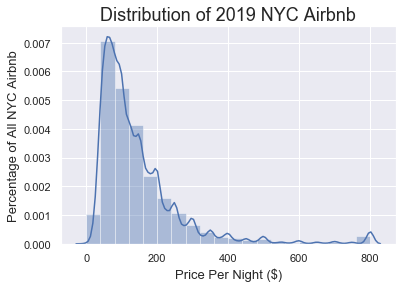

In [4]:
sns.set(style = 'darkgrid')


temp_price = list(df['price'])
counter = 0
max_800 = []
for i in temp_price:
    if i > 800:
        max_800.append(800)
    else:
        max_800.append(i)
        
ax = sns.distplot(max_800, bins = 20)
plt.title('Distribution of 2019 NYC Airbnb', fontsize = 18)
plt.xlabel('Price Per Night ($)', fontsize = 13)
plt.ylabel('Percentage of All NYC Airbnb', fontsize = 13)
plt.show()

Text(0.5, 1.0, 'Distribution of Review Counts for Airbnbs')

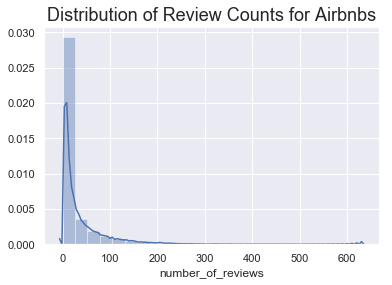

In [5]:
sns.distplot(df['number_of_reviews'], bins = 24).set_title('Distribution of Review Counts for Airbnbs',fontsize = 18)

In [6]:
df['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [7]:
#hosts (IDs) that have the most listings on Airbnb
top_host = df['host_id'].value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Text(0.5, 1.0, 'Number of Airbnbs in Each Neighbourhood')

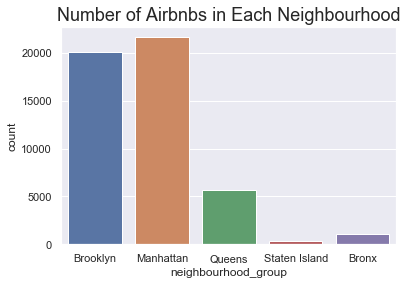

In [8]:
sns.countplot(df['neighbourhood_group']).set_title('Number of Airbnbs in Each Neighbourhood', fontsize=18)

Text(0.5, 1.0, 'Distribution of Prices for Each Neighbourhood Group')

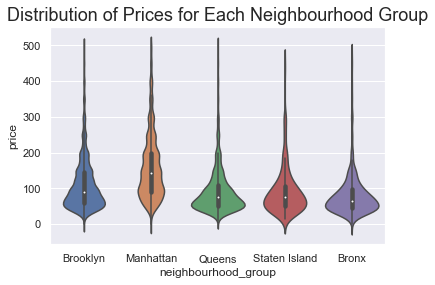

In [9]:
sub_5 = df[df.price < 500]
price_viz = sns.violinplot(data=sub_5, x='neighbourhood_group', y='price')
price_viz.set_title('Distribution of Prices for Each Neighbourhood Group',fontsize = 18)

In [10]:
#top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

## Heatmap

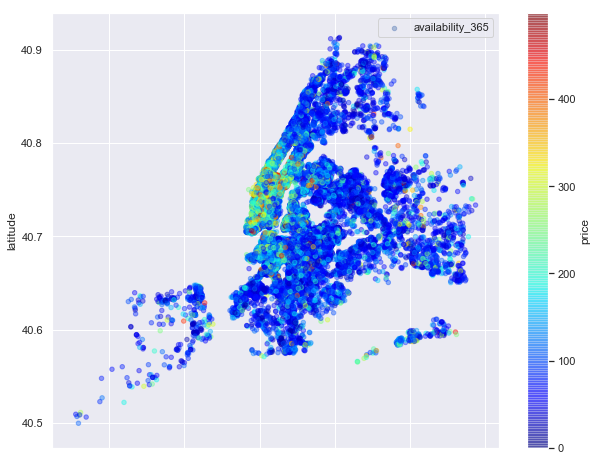

In [11]:
viz_4=sub_5.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

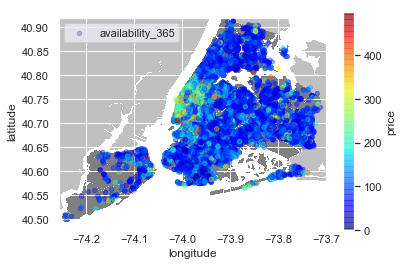

In [12]:
import matplotlib.image as mpimg
nyc_map = mpimg.imread('nyc_map.png')
plt.imshow(nyc_map, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

#using scatterplot again
sub_5.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [13]:
import folium
from folium.plugins import HeatMap
map=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),
        radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

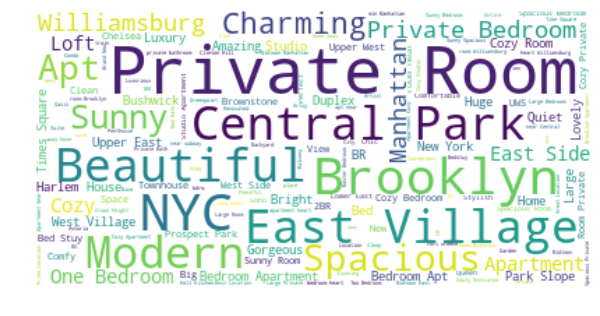

In [14]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(i) for i in df.name)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Regression

C:\Users\Riley\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


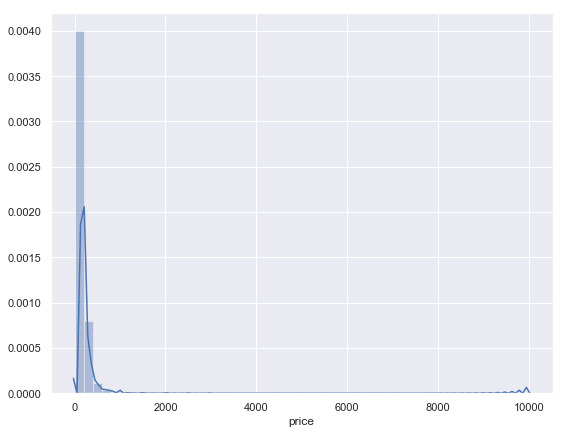

In [15]:
plt.figure(figsize=(9,7))
sns.distplot(df['price'])

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.


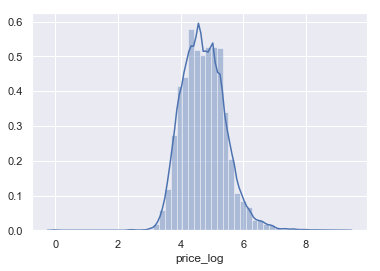

In [16]:
df_trans = df.copy()
df_trans['price_log'] = np.log(df.price + 1)

sns.distplot(df_trans['price_log'])

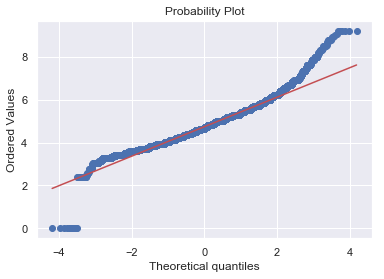

In [17]:
from scipy import stats
stats.probplot(df_trans['price_log'], plot=plt)
plt.show()

Normal is an appropriate assumption

Map our categorical vars

In [18]:
df_trans['neighbourhood_group']= df_trans['neighbourhood_group'].astype("category").cat.codes
df_trans['neighbourhood'] = df_trans['neighbourhood'].astype("category").cat.codes
df_trans['room_type'] = df_trans['room_type'].astype("category").cat.codes
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null int8
neighbourhood                     48895 non-null int16
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null int8
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
price_log                         48895 non-null float64
dtypes: float64(4), int16(1), int64(6), int8(2), object(1)
memory usage: 4.3+ MB


Remove useless cols from our dataframe before doing regression

In [19]:
df_trans.drop(['name','host_id','price'], axis=1, inplace=True)

A pearson Corr Martrix will check if price has a strong correlations with any features.

Text(0.5, 1.0, 'Correlation Matrix')

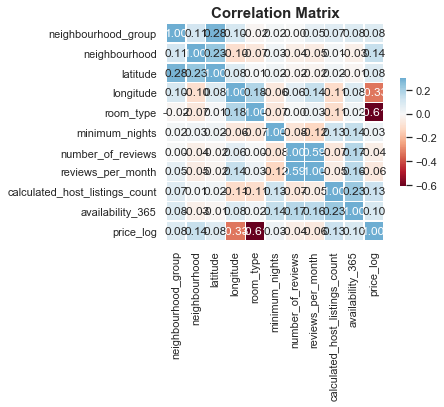

In [20]:
corr = df_trans.corr(method='pearson')

sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

Residuals

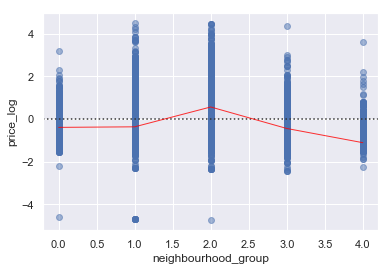

In [21]:
nyc_model_x, nyc_model_y = df_trans.iloc[:,:-1], df_trans.iloc[:,-1]


sns.residplot(nyc_model_x.iloc[:,0],nyc_model_y, lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

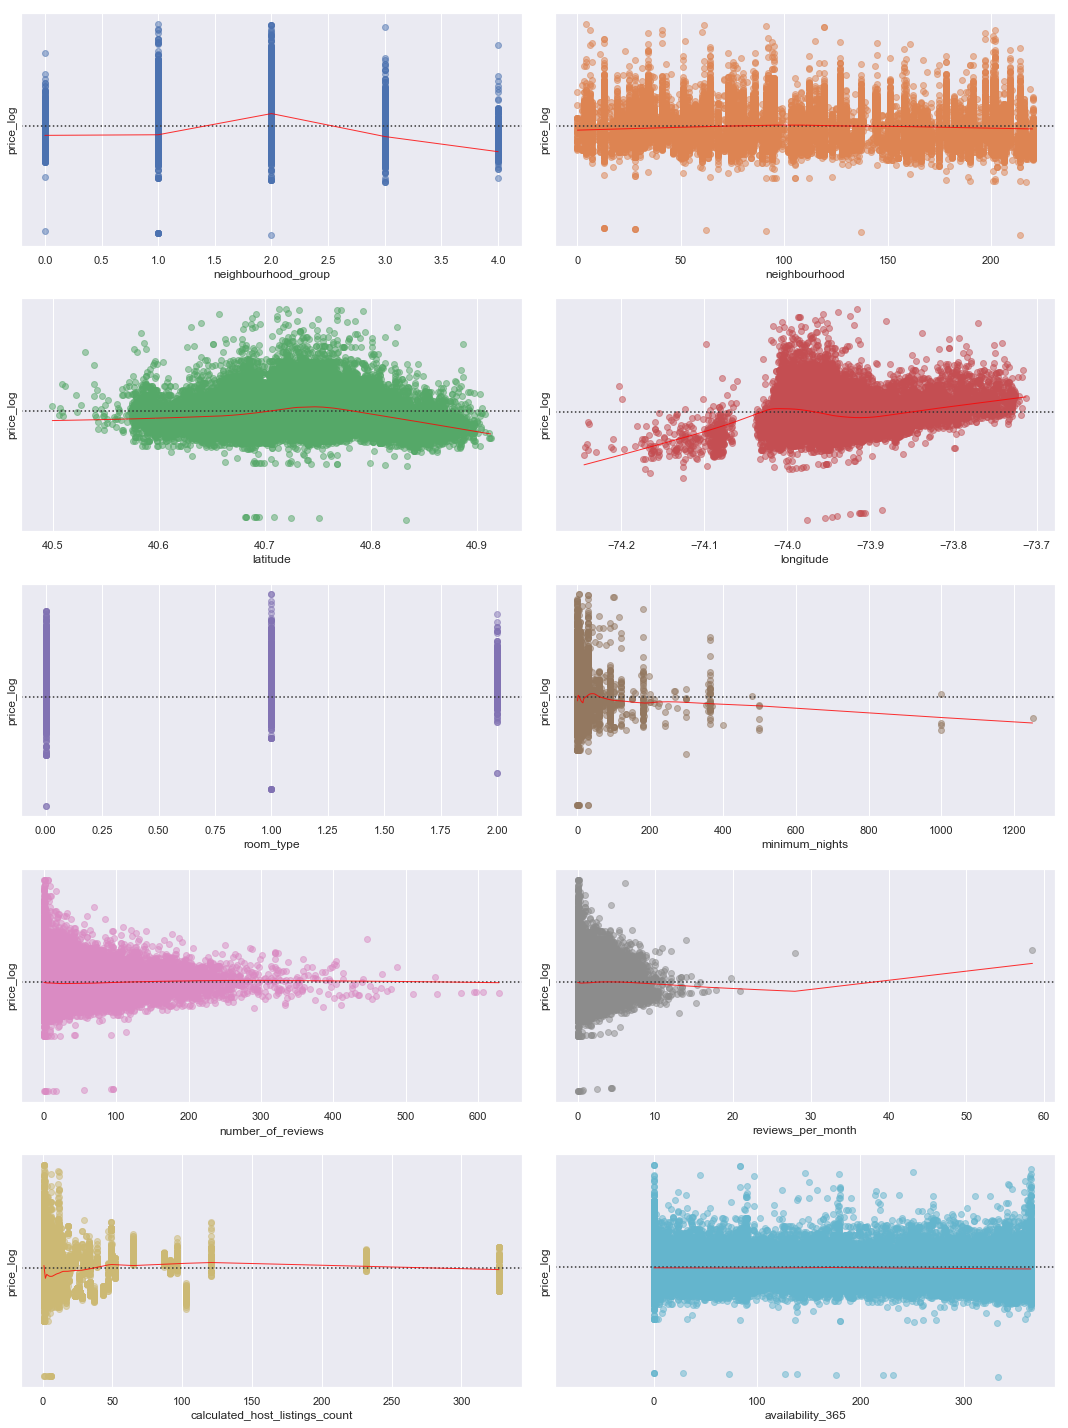

In [60]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(nyc_model_x.iloc[:,0],nyc_model_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,1],nyc_model_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,2],nyc_model_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,3],nyc_model_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,4],nyc_model_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,5],nyc_model_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,6],nyc_model_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,7],nyc_model_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,8],nyc_model_y, lowess=True, ax=axes[4, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(nyc_model_x.iloc[:,9],nyc_model_y, lowess=True, ax=axes[4, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()

Variance Inflation Factor (VIF) for Detecting Multicolinearity

In [91]:
names = list(nyc_model_x)

for i in range(0, len(names)):
    y = nyc_model_x.loc[:, nyc_model_x.columns == names[i]]
    x = nyc_model_x.loc[:, nyc_model_x.columns != names[i]]
    model = sm.OLS(y,x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(names[i], (round(rsq,2)))
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(names[i], vif)
    )

R Square value of neighbourhood_group column is -188.07 keeping all other columns as features
Variance Inflation Factor of neighbourhood_group column is 0.01 

R Square value of neighbourhood column is -51269.48 keeping all other columns as features
Variance Inflation Factor of neighbourhood column is 0.0 

R Square value of latitude column is 1.0 keeping all other columns as features
Variance Inflation Factor of latitude column is 484853.22 

R Square value of longitude column is 1.0 keeping all other columns as features
Variance Inflation Factor of longitude column is 483462.35 

R Square value of room_type column is -162.8 keeping all other columns as features
Variance Inflation Factor of room_type column is 0.01 

R Square value of minimum_nights column is 0.15 keeping all other columns as features
Variance Inflation Factor of minimum_nights column is 1.18 

R Square value of number_of_reviews column is 0.5 keeping all other columns as features
Variance Inflation Factor of number_o

Since the VIF values are all relatively small (except for the categorical vars) we can assume there is no Multicolinearity

In [171]:
x_train, x_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#nyc_model_x = scaler.fit_transform(nyc_model_x)

C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [152]:
lab_enc = preprocessing.LabelEncoder()
feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(x_train, lab_enc.fit_transform(y_train))

C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [76]:
pd.Series(data=feature_model.feature_importances_, index=names).sort_values(ascending=False)

longitude                         0.185402
latitude                          0.184191
reviews_per_month                 0.140456
number_of_reviews                 0.129968
minimum_nights                    0.118594
availability_365                  0.114218
calculated_host_listings_count    0.057805
neighbourhood                     0.053722
room_type                         0.009733
neighbourhood_group               0.005911
dtype: float64

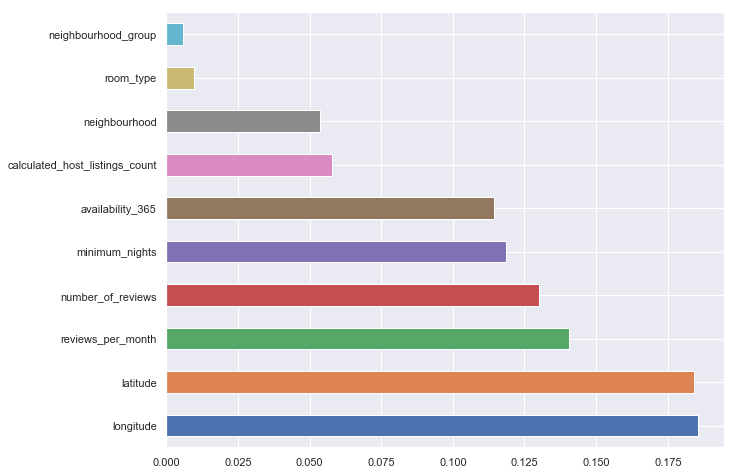

In [77]:
feat_importances = pd.Series(feature_model.feature_importances_, index=df_trans.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Model with all features

In [178]:
x_train_test = sm.add_constant(x_train)
linear_mod = sm.OLS(y_train, x_train_test)
results = linear_mod.fit()

In [179]:
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2880.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:00:15   Log-Likelihood:                -25842.
No. Observations:               34226   AIC:                         5.171e+04
Df Residuals:                   34215   BIC:                         5.180e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7388      0.003   1702.585      0.0

In [180]:
x_test_const = sm.add_constant(x_test)
    
ynewpred =  results.predict(x_test_const)

In [181]:
mse = np.mean((ynewpred - y_test)**2)
math.sqrt(mse)

0.5045500401882062

Model removing neighbourhood_group and room_type

In [37]:
nyc_trees = nyc_model_x.copy()
nyc_trees.drop(['neighbourhood_group','room_type'], axis=1, inplace=True)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(nyc_trees, nyc_model_y, test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
X_train_const = sm.add_constant(X_train)
linear_mod2 = sm.OLS(Y_train, X_train_const)
trees_results = linear_mod2.fit()

trees_results.params
print(trees_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     748.0
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:19:58   Log-Likelihood:                -33534.
No. Observations:               34226   AIC:                         6.709e+04
Df Residuals:                   34217   BIC:                         6.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7388      0.003   1359.934      0.0

In [190]:
X_test_const = sm.add_constant(X_test)
    
ynewpred =  trees_results.predict(X_test_const) # predict out of sample

RMSE on our predictive model

In [186]:
mse = np.mean((ynewpred - y_test)**2)
math.sqrt(mse)

0.52981484771318